<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/notebooks/pa_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summarize the results of predicting differentially expressed genes from TSS signal

## Background

## Tasks

## Setup

### MSI Parition

```salloc --nodes=1 --ntasks-per-node=16 --mem=64gb -t 24:00:00 -p interactive```

### Conda

```r421_py37_tf26```

### Install R packages

In [ ]:
required_packages <- c(
  'BiocManager', 'devtools', 'Matrix',
  'dplyr', 'tidyr', 'stringr',
  'DESeq2', 'clusterProfiler', 'ggplot2',
  'pROC', 'irlba'
)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

In [ ]:
for (p in required_packages){
  library(p, character.only  = TRUE)
}

Bioconductor version '3.15' is out-of-date; the current release version '3.16'
  is available with R version '4.2'; see https://bioconductor.org/install

Loading required package: usethis


Attaching package: ‘devtools’


The following object is masked from ‘package:BiocManager’:

    install


Warning message:
“package ‘Matrix’ was built under R version 4.2.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


Warning message:
“package ‘stringr’ was built under R version 4.2.2”
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The fol

### Load bpt

In [ ]:
devtools::load_all('../bpt')

ℹ Loading bpt
Warning message:
“replacing previous import ‘GenomicRanges::union’ by ‘dplyr::union’ when loading ‘bpt’”
Warning message:
“replacing previous import ‘GenomicRanges::intersect’ by ‘dplyr::intersect’ when loading ‘bpt’”
Warning message:
“replacing previous import ‘GenomicRanges::setdiff’ by ‘dplyr::setdiff’ when loading ‘bpt’”


## Parameters

In [ ]:
ARGS <- list(
  remote_result_files = c(
    Ascl1 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Ascl1_version=20200128a/res_pa.tsv',
    Duren = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Duren_version=20221116a/res_pa.tsv',
    Perrin = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=perrin_version=20221208a/res_pa.tsv',
    Ramirez_macrophage = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=ramirez_version=20221202b/res_pa.tsv',
    Liu = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=liu_version=20221202d/res_pa.tsv',
    Markov = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=markov_version=20221121b/res_pa.tsv',
    Schwarz = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=schwarz_version=20221202e/res_pa.tsv',
    Ramirez_monocyte = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=ramirez_version=20221202b/res_pa3.tsv',
    Ramirez_mono_der = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=ramirez_version=20221202b/res_pa2.tsv',
    Liu2 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=liu2_version=20221202g/res_pa.tsv',
    Melendez = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=melendez_version=20221202a/res_pa.tsv',
    Benchetrit = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=benchetrit_version=20221130a/res_pa.tsv',
    Wu = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=wu_version=20221121a/res_pa.tsv',
    Yagi = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=yagi_version=20221121a/res_pa.tsv',
    Knaupp = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=knaupp_version=20221118b/res_pa.tsv',
    Li = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Li_version=20221117a/res_pa.tsv',
    Zenere = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Zenere_version=20221115a/res_pa2.tsv'
  )
)

In [ ]:
ARGS$local_result_files <- gsub('https://', './', ARGS$remote_result_files)
ARGS$s3_result_files <- gsub('https://s3.msi.umn.edu/', 's3://', ARGS$remote_result_files)

## Read results

In [ ]:
df <- NULL
for (i in 1:length(ARGS$local_result_files)){
  sprintf('reading %s', ARGS$local_result_files[i]) %>% message()
  x <- read.table(ARGS$local_result_files[i], header = TRUE, sep = '\t')
  x <- cbind(dataset = names(ARGS$remote_result_files[i]), x)
  df <- rbind(df, x)
}

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Ascl1_version=20200128a/res_pa.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Duren_version=20221116a/res_pa.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=perrin_version=20221208a/res_pa.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=ramirez_version=20221202b/res_pa.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=liu_version=20221202d/res_pa.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=markov_version=20221121b/res_pa.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=schwarz_version=20221202e/res_pa.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=ramirez_version=20221202b/res_pa3.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=ramirez_version=20221202b/res_pa2.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=liu2_version=20221202g/res_pa.tsv

reading ./s3.msi.umn.edu/gongx030/datasets/dataset=melendez_version=20221202a/res_pa.tsv

reading ./s3.msi.umn.edu/gongx0

## Overall performance

In [ ]:
df_sum <- df %>%
  group_by(block_size, latent_dim, method, comp) %>%
  filter(block_size %in% c(640, 1280, 2560)) %>%
  do(
    auc = roc(y ~ y_pred, ., plot = FALSE, print.auc = FALSE, quiet = TRUE)$auc %>% as.numeric(),
    n_down = sum(.$y == 0),
    n_up = sum(.$y == 1),
  ) %>%
  mutate(auc = as.numeric(auc), n_down = as.integer(n_down), n_up = as.integer(n_up)) 

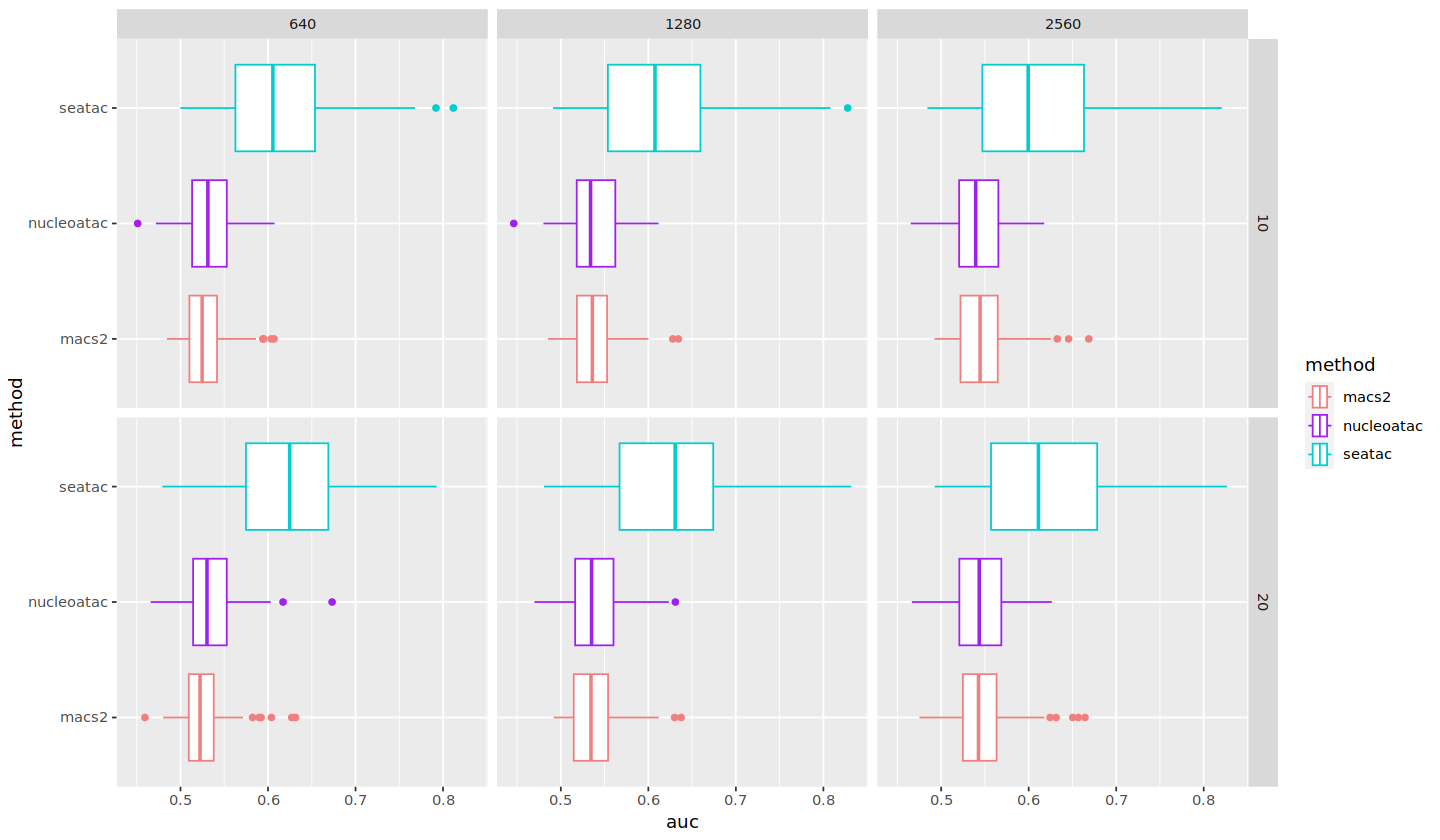

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 7)
df_sum %>%
  mutate(method = factor(method, c('macs2', 'nucleoatac', 'seatac'))) %>%
  ggplot(aes(y = method, x = auc, color = method)) +
    geom_boxplot(notch = FALSE) + 
    scale_color_manual(values= c(macs2 = 'lightcoral', nucleoatac = 'purple', seatac = 'cyan3')) +
    scale_fill_manual(values= c(macs2 = 'lightcoral', nucleoatac = 'purple', seatac = 'cyan3')) +
    facet_grid(latent_dim ~ block_size) 

## Performance in each dataset

In [ ]:
df_sum <- df %>%
  filter(block_size == 640L & latent_dim == 10L) %>%
  group_by(dataset, method, comp) %>%
  do(
    auc = roc(y ~ y_pred, ., plot = FALSE, print.auc = FALSE, quiet = TRUE)$auc %>% as.numeric(),
    n_down = sum(.$y == 0),
    n_up = sum(.$y == 1),
  ) %>%
  mutate(auc = as.numeric(auc))

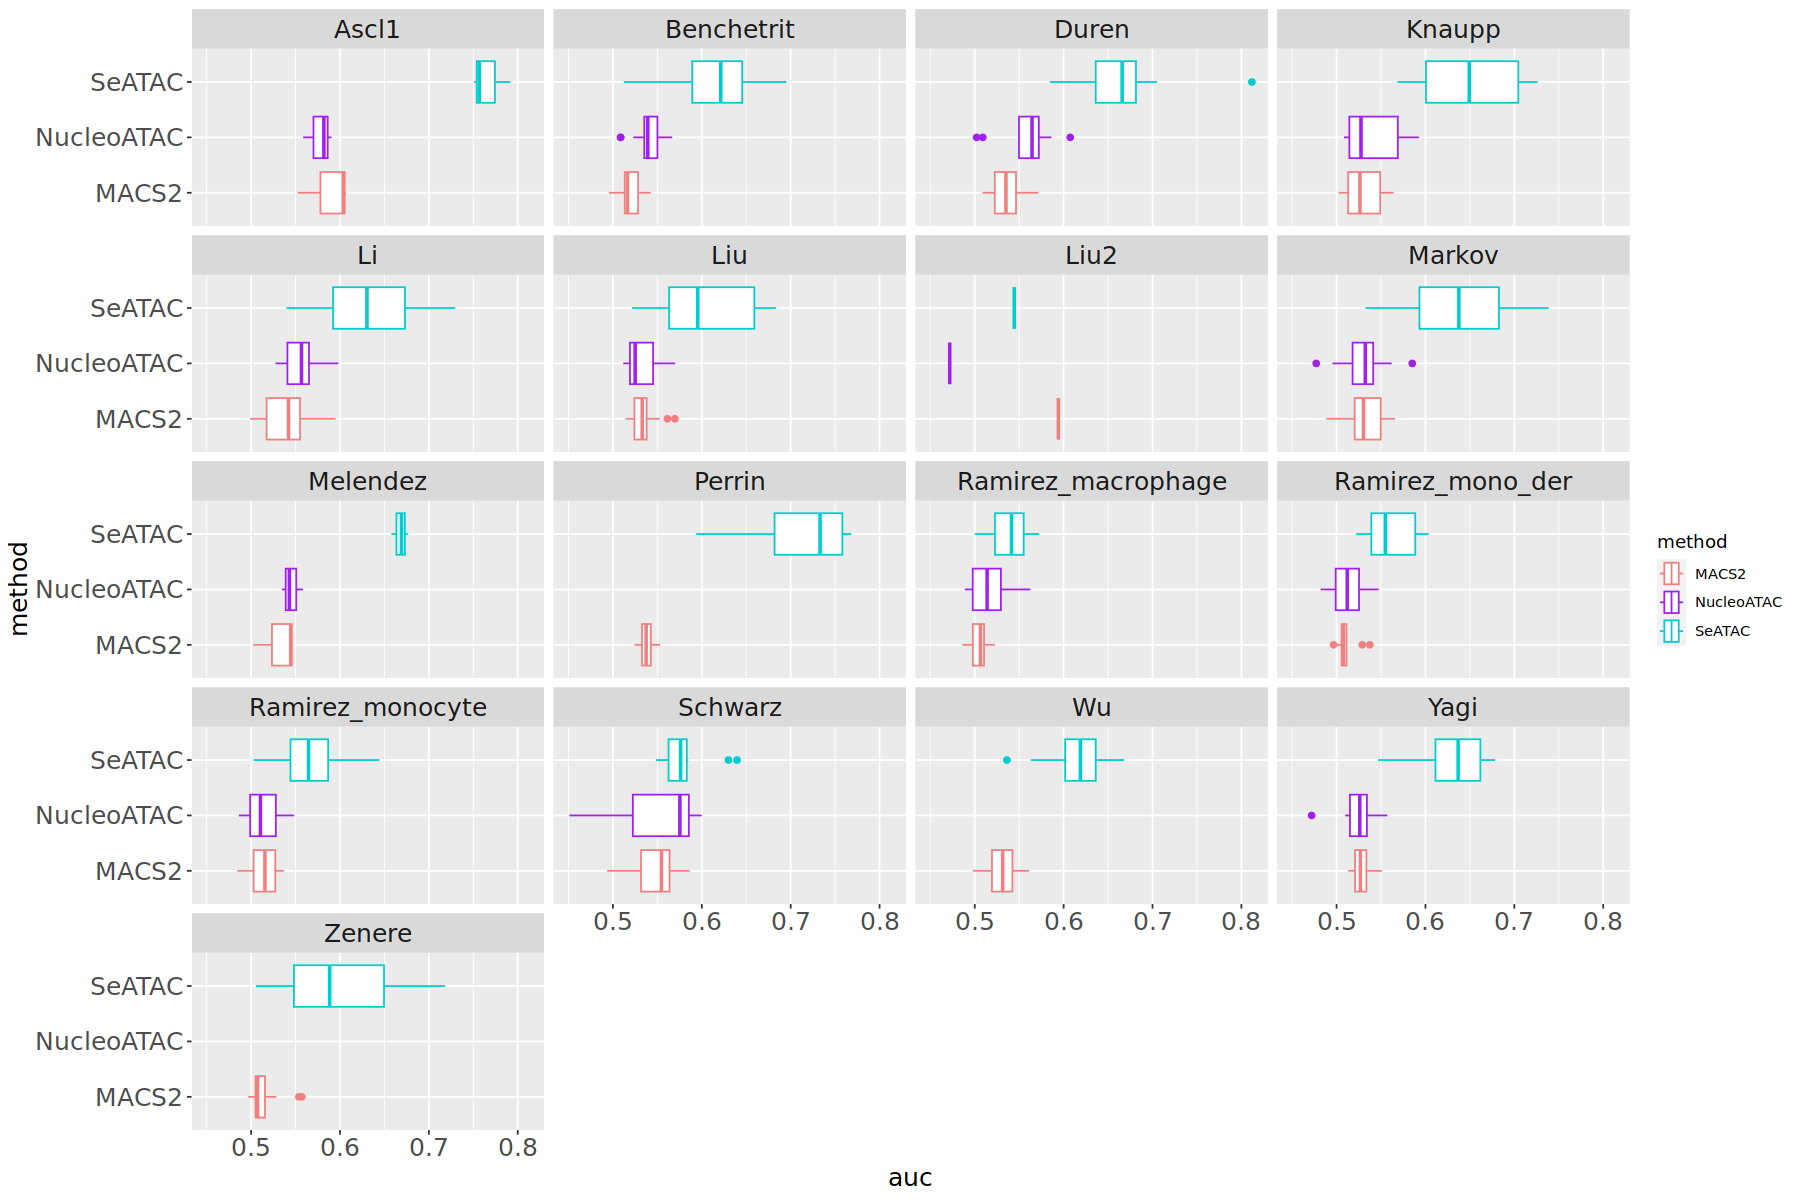

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)
df_sum %>%
  mutate(method = factor(method, c('macs2', 'nucleoatac', 'seatac'), c('MACS2', 'NucleoATAC', 'SeATAC'))) %>%
  ggplot(aes(y = method, x = auc, color = method)) +
    geom_boxplot(notch = FALSE) + 
    scale_color_manual(values= c(MACS2 = 'lightcoral', NucleoATAC = 'purple', SeATAC = 'cyan3')) +
    scale_fill_manual(values= c(MACS2 = 'lightcoral', NucleoATAC = 'purple', SeATAC = 'cyan3')) +
    facet_wrap(. ~ dataset, ncol = 4) +
    theme(
      axis.text = element_text(size = 15),
      axis.title = element_text(size = 15),
      strip.text.x = element_text(size = 15),
      strip.text.y = element_text(size = 15)
    )

## SessionInfo

In [ ]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /panfs/jay/groups/18/garrydj/gongx030/.conda/envs/r421_py37_tf26/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] bpt_0.1.005                 irlba_2.3.5.1              
 [3] pROC_1.18.0                 ggplot2_3.4.0              
 [5] clusterProfiler_4.4.4       DESeq2_1.36.0              
 [7] SummarizedExperiment_1.26.1 Biobase_2.56.0             
 [9] MatrixGen